LINEAR ALGEBRA
A lot of things of linear algebra can be done with Numpy, but Scipy makes them as efficient as possible.

In [143]:
from scipy.linalg import solve_triangular
import numpy as np

In [144]:
a = np.array([[3,0,0,0],[2,1,0,0],[1,0,1,0],[1,1,1,1]])

In [145]:
b = np.array([4,2,4,2])

In [146]:
x = solve_triangular(a,b,lower=True)

In [147]:
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

Toeplitz matrix (matrix with constant diagonal which can be defined exclusively by its first row and first column)

In [148]:
from scipy.linalg import solve_toeplitz, toeplitz

In [149]:
c = np.array([1,3,6,10])
r = np.array([1,-1,-2,-3])
b = np.array([1,2,2,5])
y = solve_toeplitz((c,r),b)

In [150]:
y

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

EIGENVALUE PROBLEMS
They can be solved using Numpy, so here we focus on particular cases of optimization

In [151]:
from scipy.linalg import eigh_tridiagonal

In [152]:
#Tridiagonal matrix
A = np.diag(3*np.ones(4)) + np.diag(-np.ones(3), k=1) + np.diag(-np.ones(3), k=-1) 

In [153]:
d=3*np.ones(4)
e = -np.ones(3)
w,v = eigh_tridiagonal(d,e)

In [154]:
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [155]:
w

array([1.38196601, 2.38196601, 3.61803399, 4.61803399])

In [156]:
v

array([[ 0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [ 0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [ 0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [ 0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [157]:
A@v.T[0]

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

In [158]:
w[0]*v.T[0] #by definition the same as the previous operation

array([0.51374315, 0.83125388, 0.83125388, 0.51374315])

SPECIAL MATRICES
Fiedler matrix: A_ij = |a_i - a_j| where a_ij is some sequence of numbers

In [159]:
from scipy.linalg import fiedler
fiedler([1,4,12,45])


array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

Toeplitz matrices 

In [160]:
toeplitz([1,2,3,6,0,0],[1,4,5,6,0,0])

array([[1, 4, 5, 6, 0, 0],
       [2, 1, 4, 5, 6, 0],
       [3, 2, 1, 4, 5, 6],
       [6, 3, 2, 1, 4, 5],
       [0, 6, 3, 2, 1, 4],
       [0, 0, 6, 3, 2, 1]])

DECOMPOSITIONS
LU decomposition A = PLU where P is the permutation matrix, L is a lower triangular matrix and U is an upper triangular matrix   

In [161]:
from scipy.linalg import lu

In [162]:
A = np.array([[2,5,7,8],[5,2,2,8],[7,5,6,6],[5,4,4,8]])

In [163]:
P, L, U = lu(A)

In [164]:
U

array([[ 7.        ,  5.        ,  6.        ,  6.        ],
       [ 0.        ,  3.57142857,  5.28571429,  6.28571429],
       [ 0.        ,  0.        , -0.92      ,  2.96      ],
       [ 0.        ,  0.        ,  0.        ,  6.60869565]])

Cholesky decomposition: find matrix C such that A = CC^T

In [165]:
from scipy.linalg import cholesky

In [166]:
A = np.array([[1,0.2],[0.2,1]])
C = cholesky(A, lower=True)

In [167]:
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

SPARSE MATRICES
Matrices containig lots of zeros.


In [168]:
from scipy.linalg import kron #Kronecker product NOT sum (see photos in the folder)

So, what is the Kronecker sum? It is defined for two square matrices, an n × n matrix A and an m × m matrix B. The sizes of the two matrices need not match, but the matrices do need to be square.  The Kronecker sum of A and B is

A ⊕ B = A ⊗ Im + In ⊗ B

where Im and In are identity matrices of size m and n respectively.

In [169]:
N = 5
d = -2*np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N))+kron(np.identity(N), D)

In [170]:
np.size(D_kronsum)

625

Too big for any reasonable calculation! But I can use sparse matrices

In [171]:
from scipy import sparse

In [172]:
N=100
diag = np.ones(N)
diags = np.array([diag, -2*diag, diag])
D =sparse.spdiags(diags, np.array([-1,0,1]),N,N)

In [173]:
D

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 298 stored elements (3 diagonals) in DIAgonal format>

In [174]:
sparse.kronsum(D,D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

STATISTICS


**EXAMPLE 1**
$\beta$ distribution (commonly used in quantum-mechanics):
$$f(x;a,b) = \frac{\Gamma (a+b)x^{a-1} (1-x)^{b-1}}{\Gamma(a)\Gamma(b)} $$
 $0 \leq x \leq 1$

In [175]:
from scipy.stats import beta

In [176]:
#Basic statistics
a, b = 2.5,3.1
mean, var, skew, kurt = beta.stats(a,b,moments='mvsk')

In [177]:
mean

array(0.44642857)

In [178]:
var

array(0.03744395)

In [179]:
skew

array(0.1457098)

In [180]:
kurt

array(-0.66953054)

(method) ppf(
    q: Any,
    *args: Any,
    **kwds: Any
) -> (Any | NDArray)
Percent point function (inverse of cdf) at q of the given RV.

Parameters
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
x : array_like
    quantile corresponding to the lower tail probability q.

In [181]:
beta.ppf(0.99, a,b)

0.871845893864339

In [182]:
x = np.linspace(beta.ppf(0, a,b), beta.ppf(1, a,b), 100)

In [183]:
import matplotlib.pyplot as plt

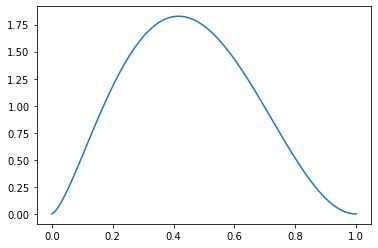

In [184]:
plt.plot(x, beta.pdf(x,a,b)) #When you have infinite distribution (normal one) it's dangerous to input 0 to 1 (- inf to +inf)

**EXAMPLE 2**
Gaussian distribution (widely used):
$$ f(x; \mu,\sigma) = \frac{1}{\sqrt{2 \pi \sigma ^2}} e^{\frac{-(x-\mu)^2}{\sigma ^2}}, -\infty < x < +\infty$$


In [185]:
from scipy.stats import norm

In [186]:
mu =1
sigma=2
mean, var = norm.stats(loc = mu, scale=sigma, moments='mv')

In [187]:
mean

array(1.)

In [188]:
var #sigma^2

array(4.)

In [189]:
x = np.linspace(norm.ppf(0.01, mu,sigma), norm.ppf(0.99, mu,sigma), 100)

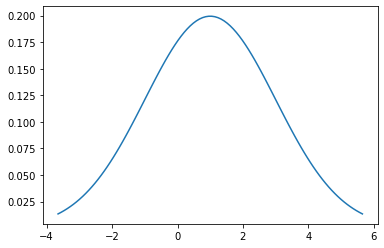

In [190]:
plt.plot(x, norm.pdf(x,mu,sigma))

**EXAMPLE 3**
Multinomial distribution, like rolling a die multiple times:
$$f(x_1, x_2,...,x_k;p_1, p_2,...,p_k) = \frac{n!}{x_1 ! x_2 !...x_k !} p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

In [191]:
from scipy.stats import multinomial


In [192]:
p = 1/6*np.ones(6)

In [193]:
multinomial.pmf([6,0,0,0,0,0], n=6, p=p) #n is the time you roll the die
#probability mass function

2.143347050754453e-05

In [194]:
multinomial.rvs(n=100, p=p, size=5) #5 trials each with 100 rolls--- random samples

array([[14, 12, 27, 19, 15, 13],
       [17, 17, 20, 15, 22,  9],
       [17, 16, 15, 14, 19, 19],
       [15, 22,  8, 16, 17, 22],
       [21, 16, 16, 15, 15, 17]])

**EXAMPLE 4**
Generating random numbers from your own distributions.
$$f(x; a_1,a_2,b_1,b_2) = \frac{1}{2(a_1 b_1 + a_2 b_2)} \left(b_1 e^{-\sqrt{\frac{x}{a_1}}} + b_2 e^{-\sqrt{\frac{x}{a_2}}}\right), 0 \leq x < \infty$$ 

In [208]:
import scipy.stats as st 

In [209]:
class mr_p_solver_dist(st.rv_continuous): #inheritance from rv_contiuous OOP 
    def _pdf(self,x,a1,a2,b1,b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1))+b2*np.exp(-np.sqrt(x/a2)))
    
my_rv = mr_p_solver_dist(a=0, b=np.inf) #bounds in 0 and +inf

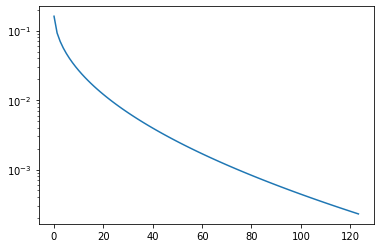

In [210]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01,a1,a2,b1,b2), my_rv.ppf(0.99,a1,a2,b1,b2), 100)
y = my_rv._pdf(x,a1,a2,b1,b2)
plt.plot(x,y)
plt.semilogy()
plt.show()


In [219]:
my_rv.rvs(a1,a2,b1,b2, size=10000)

array([23.792786  ,  0.82371682, 28.803192  , ...,  5.26523403,
       42.74384983,  4.80026228])

That's very slow if the number of random variables is high, so it's typical to define your own _rvs method in the variable class.

In [220]:
class mr_p_solver_dist1(st.rv_continuous): #inheritance from rv_contiuous OOP 
    def _pdf(self,x,a1,a2,b1,b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1))+b2*np.exp(-np.sqrt(x/a2)))
    
    def _cdf(self,x,a1,a2,b1,b2):
        return 1/(2*(a1*b1+a2*b2))*( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
            -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
            +2*a1*b1+2*a2*b2 )
    
    def _rvs(self, a1,a2,b1,b2,delta=0.001, size=None, random_state=None):
        a_min=min([a1,a2]) #approximation method to speed up the random number generation
        x=np.linspace(0, a_min*np.log(1/delta)**2,10000)
        r=np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1],a1,a2,b1,b2), r)]



In [221]:
my_rv1 = mr_p_solver_dist1(a=0, b=np.inf) #bounds in 0 and +inf

In [222]:
my_rv1._rvs(a1,a2,b1,b2, size=10000)

array([12.68446911,  6.39472859,  3.66503848, ..., 11.21463597,
        1.16441327,  5.05851665])